# Project Final Report

## Introduction

**Background**  
In recent years, online gaming has produced vast behavioral datasets that offer insights into user engagement and retention. “Minecraft,” as an open‐world game, generates detailed logs of player activity, making it an ideal case for studying how simple demographic factors relate to play behavior. By analyzing total play duration alongside basic player attributes, we aim to uncover patterns that could inform game design and personalized recommendations.

**Research Question**  
Can a player’s age and total play time predict their experience level on the game server?

- **Response variable**: `experience` (factor) – player’s self‐reported expertise level (“Pro”, “Regular”, “Amateur”, “Beginner”)  
- **Predictor variables**:  
  - `Age` (numeric; years)  
  - `played_hours` (numeric; total play duration in hours)  

**Data Description**  
We use the `players.csv` dataset exported from the research server. It contains **196** observations and **9** variables:

| variable           | type       | description                                    |
|--------------------|------------|------------------------------------------------|
| experience         | factor     | player’s experience level                      |
| subscribe          | logical    | whether the player holds a subscription        |
| hashedEmail        | character  | anonymized user identifier                     |
| played_hours       | double     | total play duration per player (hours)         |
| name               | character  | player’s display name                          |
| gender             | character  | player’s self‐reported gender                  |
| age                | double     | player’s age in years                          |
| individualId       | logical    | all NA (no values) — will be dropped           |
| organizationName   | logical    | all NA (no values) — will be dropped           |

For this analysis, we will:

1. Convert `experience` to a factor.  
2. Drop the two all‐NA columns (`individualId`, `organizationName`).  
3. Focus only on the three variables needed for prediction: `experience`, `Age`, and `played_hours`.  




## Methods & Results  
In this phase, we apply a classification framework because our response variable, `experience`, is inherently categorical rather than numerical. By first recasting the character field `experience` into a factor, we can then use classification algorithms to predict it. We posit that a player’s `age` and total `played_hours` are the key features driving their experience level, so these two variables will form the predictors in our model.

## Load & wrangle  
We start by loading the R packages needed for data cleaning and modeling. Using `read_csv()`, we import the `players.csv` dataset and inspect its top rows with `head()`. Next, we transform `experience` from a text column into a factor suitable for classification, and then pare down the data to the three fields—`experience`, `Age`, and `played_hours`—that we will use in the subsequent analysis.  


In [3]:
# Load required packages for data manipulation and modeling
library(tidyverse)   
library(tidymodels)   

# Read in the players.csv file and peek at the first 10 rows
players <- read_csv("players.csv")
head(players, 10)

# Convert the response variable 'experience' from character to factor,
# and keep only the three columns we will use in the classification
ready_players <- players |>
  mutate(experience = as_factor(experience)) |>
  select(experience, Age, played_hours)

# Show the cleaned dataset
ready_players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


experience,Age,played_hours
<fct>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
Amateur,21,0.7
Regular,21,0.1
Amateur,17,0.0
Regular,19,0.0
Amateur,21,0.0
Amateur,17,0.1


In [2]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Summary & visualization of the dataset

    experience      Age         played_hours    
 Pro     :14   Min.   : 8.00   Min.   :  0.000  
 Veteran :48   1st Qu.:17.00   1st Qu.:  0.000  
 Amateur :63   Median :19.00   Median :  0.100  
 Regular :36   Mean   :20.52   Mean   :  5.846  
 Beginner:35   3rd Qu.:22.00   3rd Qu.:  0.600  
               Max.   :50.00   Max.   :223.100  
               NA's   :2                        

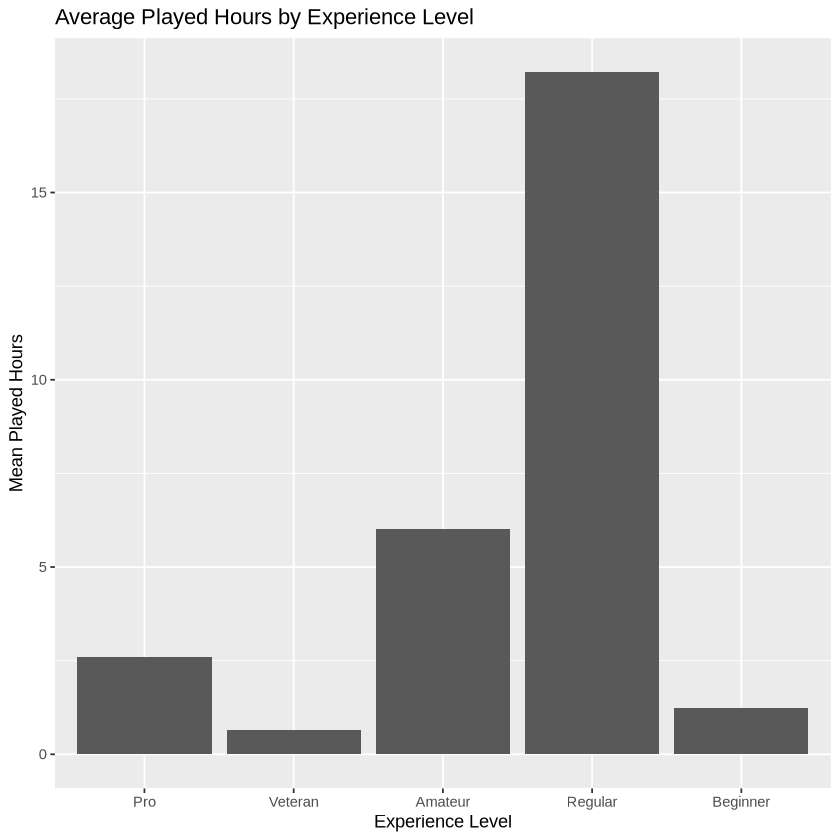

In [8]:
# 1. Generate a numerical summary of the three key columns
summary(ready_players)

# 2. Compute mean played_hours by experience level
avg_played <- ready_players %>%
  group_by(experience) %>%
  summarize(avg_hours = mean(played_hours),na.rm = TRUE, .groups = "drop")

# 3. Draw a bar chart of the average play time per experience category
library(ggplot2)
ggplot(avg_played, aes(x = experience, y = avg_hours)) +
  geom_col() +
  labs(
    title = "Average Played Hours by Experience Level",
    x     = "Experience Level",
    y     = "Mean Played Hours"
  )


We first use the group_by and summarize function to get the average player's played hours in each experience. Then we use the ggplot function to draw a bar graph. From the bar graph, we can see that regular has the highest average played hour (18 hours) and veteran has the lowest average played hour(1 hour).We can infer that the played_hour may have a strong relationship with experience.



experience,mean_age,na.rm
<fct>,<dbl>,<lgl>
Pro,NA,TRUE
Veteran,20.95833,TRUE
Amateur,20.25397,TRUE
Regular,NA,TRUE
Beginner,21.65714,TRUE


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_col()`).”


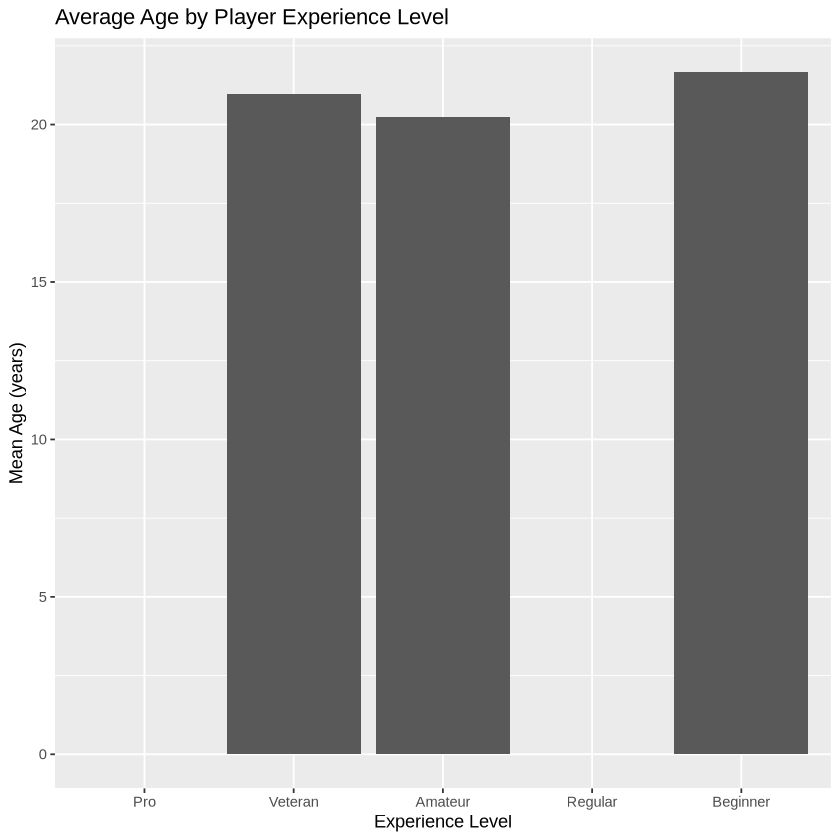

In [11]:
# 1. Summarize the ‘age’ variable grouped by experience level
avg_age <- ready_players %>%
  group_by(experience) %>%
  summarize(mean_age = mean(Age),na.rm = TRUE,Add summary statistics and bar charts for played hours and age by experience level .groups = "drop")

# 2. Display the table of mean ages
avg_age

# 3. Plot a bar chart of average age per experience category
library(ggplot2)
ggplot(avg_age, aes(x = experience, y = mean_age)) +
  geom_col() +
  labs(
    title = "Average Age by Player Experience Level",
    x = "Experience Level",
    y = "Mean Age (years)")


We first use the group_by and summarize function to get the average player's age in each experience. Then we use the ggplot function to draw a bar graph. From the bar graph, we can see that 5 experiences have similar average ages with Regular and Pro slightly higher than others. We can infer that the age variable may have a weak relationship with the experience.

During the classification, we always need to standardize our predictor. As we need to find the nearest points near the point that we want to predict using the distance between them, we want to prevent one predictor which has large numbers compared with another predictor from dominating the result. So, we also need to plot a standardized scatter plot rather than a non-standardized scatter plot

Age,played_hours,experience
<dbl>,<dbl>,<fct>
-1.86578776,0.86235447,Pro
-0.57017138,-0.07214775,Veteran
-0.57017138,-0.20615184,Veteran
0.07763681,-0.18146687,Amateur
0.07763681,-0.20262541,Regular
-0.57017138,-0.20615184,Amateur
-0.24626729,-0.20615184,Regular
0.07763681,-0.20615184,Amateur
-0.57017138,-0.20262541,Amateur


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


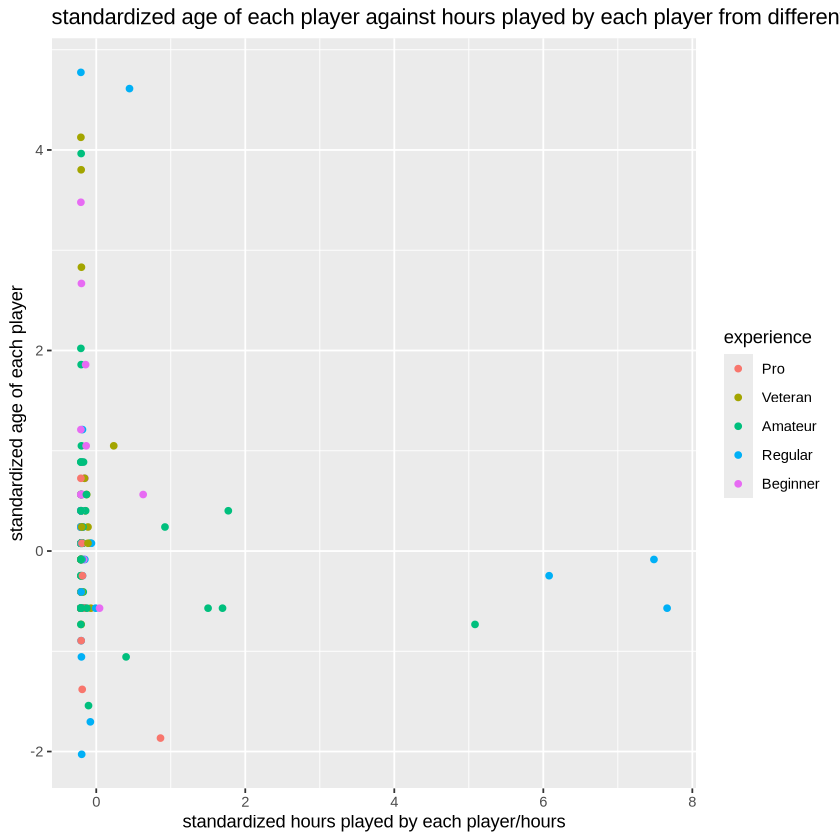

In [16]:
#standardized scatter plot of age of each player against hours played by each player from different experience
recipe <- recipe(experience ~ ., data = ready_players)
prep_recipe <- recipe |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

experience_scaled <- prep_recipe |>  
                            prep() |> 
                            bake(ready_players)
experience_scaled
standardizescatterplot <- ggplot(experience_scaled, aes(x = played_hours, y = Age,color = experience))+
                          geom_point()+
                          xlab('standardized hours played by each player/hours')+
                          ylab('standardized age of each player')+
                          ggtitle("standardized age of each player against hours played by each player from different experience")
standardizescatterplot

We use the recipe function to standardize the data, then use prep() and bake() functions to get a table of the standardized response variable and two standardized predictor variables. So, we can use the ggplot function to plot a standardized scatter plot. In the graph, we can see that the players with high played hours and low ages are Regular and players with medium played hours and low ages are Amateur.

## Data Analysis & Visualization

In a k-nearest neighbors classification, the choice of **k** can dramatically change model accuracy, so we systematically evaluate multiple **k** values to find the best one. First, we split our data into a **75% training set** (to build the model) and a **25% test set** (to assess predictive performance). Next, we define a tibble of candidate neighbor counts (`1:10`) as our tuning grid. We then specify a KNN model with `nearest_neighbor(neighbors = tune())` and create a recipe that **scales** and **centers** all predictors—to ensure no feature dominates the distance calculation. Using `workflow()`, we combine the recipe and the model, and apply **v-fold cross-validation** on the training folds to estimate accuracy for each **k**. Finally, we call `collect_metrics()` to assemble the results, filter to the `"accuracy"` metric, sort in descending order, and use `slice(1)` (or `head(1)`) with `pull()` to pick out the optimal **k** value.


In [17]:
#choose the best k value using v-fold
set.seed(8888)
experience_split <- initial_split(ready_players, prop = 0.75, strata = experience)
experience_train <- training(experience_split)
experience_test  <- testing(experience_split)
experience_vfold <- vfold_cv(experience_train, v = 10, strata = experience)
k_vals <- tibble(neighbors = 1:10)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
recipe <- recipe(experience ~ ., data = experience_train)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
knn_result <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = experience_vfold, grid = k_vals) |>
  collect_metrics()
accuracies <- knn_result |>
  filter(.metric == "accuracy")
accuracies
best_k <- accuracies |>
        arrange(- mean) |>
        head(1) |>
        pull(neighbors)
best_k

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 14 rows.
               ✖ Assigned data has 15 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 15 to size 14.

There were issues with some computations   A: x1

→ B | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
There were issues with some computations   A: x2   B: x1

There were issues with some computations   A: x2   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2535256,8,0.03725027,Preprocessor1_Model01
2,accuracy,multiclass,0.2592949,8,0.03153592,Preprocessor1_Model02
3,accuracy,multiclass,0.1913462,8,0.03252376,Preprocessor1_Model03
4,accuracy,multiclass,0.1796474,8,0.03651069,Preprocessor1_Model04
5,accuracy,multiclass,0.1879808,8,0.03366709,Preprocessor1_Model05
6,accuracy,multiclass,0.2413462,8,0.03819947,Preprocessor1_Model06
7,accuracy,multiclass,0.2947115,8,0.03089341,Preprocessor1_Model07
8,accuracy,multiclass,0.2697115,8,0.03610447,Preprocessor1_Model08
9,accuracy,multiclass,0.2780449,8,0.03474186,Preprocessor1_Model09


[1] 7